## Problem Statement

BoomBikes have contracted a consulting company to understand the factors on which the demand for their shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal

- We are required to model the demand for shared bikes with the available independent variables. 
- Model will be used by the management to understand how exactly the demands vary with different features. 
- BoomBikes can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- Model will be a good way for management to understand the demand dynamics of a new market. 


In [136]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

### Reading & Understanding the Data

In [137]:
# Importing the day.csv file & checking the dataframe

boom_bikes = pd.read_csv('day.csv')
boom_bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [138]:
# Checking shape of dataframe
boom_bikes.shape

(730, 16)

In [139]:
# Checking number of null values in dataframe
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We will use the total number of customers 'cnt'  for our model building and drop 'registered' and 'casual' columns from dataframe.

In [140]:
# Dropping 'registered' and 'casual' columns from dataframe

boom_bikes = boom_bikes.drop(['casual', 'registered'], axis=1)
boom_bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600

In [141]:
# Checking shape of dataframe

boom_bikes.shape

(730, 14)

In [142]:
# Checking information on numeric values in dataframe
boom_bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

In [143]:
# Dropping dteday & instant as not needed for our analysis
boom_bikes = boom_bikes.drop(['dteday','instant'], axis = 1)
boom_bikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

Since season, year, month, weekday, weathersit are categorical data, we will replace the numeric values with their correct representation / meaning, as it will be easier to interpret when we create dummy variables at later stage

In [144]:
# Replacing the numeric values of season with their correct representation
boom_bikes[['season']] = boom_bikes[['season']].apply(lambda x: x.map({1: 'spring', 2 : 'summer', 3: 'fall', 4 : 'winter'}))
boom_bikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        6           0           2  14.110847   
1  spring   0     1        0        0           0           2  14.902598   
2  spring   0     1        0        1           1           1   8.050924   
3  spring   0     1        0        2           1           1   8.200000   
4  spring   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [145]:
# Replacing the numeric values of year with their correct representation
boom_bikes[['yr']] = boom_bikes[['yr']].apply(lambda x: x.map({0: '2018', 1 : '2019'}))
boom_bikes.head()

season    yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring  2018     1        0        6           0           2  14.110847   
1  spring  2018     1        0        0           0           2  14.902598   
2  spring  2018     1        0        1           1           1   8.050924   
3  spring  2018     1        0        2           1           1   8.200000   
4  spring  2018     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [146]:
# Replacing the numeric values of month with their correct representation
boom_bikes[['mnth']] = boom_bikes[['mnth']].apply(lambda x: x.map({1: 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 
                                                                   6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct',
                                                                   11 : 'Nov', 12 : 'Dec'}))
boom_bikes.head()

season    yr mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring  2018  Jan        0        6           0           2  14.110847   
1  spring  2018  Jan        0        0           0           2  14.902598   
2  spring  2018  Jan        0        1           1           1   8.050924   
3  spring  2018  Jan        0        2           1           1   8.200000   
4  spring  2018  Jan        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [147]:
# Replacing the numeric values of weekday with their correct representation
boom_bikes[['weekday']] = boom_bikes[['weekday']].apply(lambda x: x.map({0: 'Tue', 1 : 'Wed', 2: 'Thur', 3 : 'Fri', 4 : 'Sat',
                                                                         5 : 'Sun', 6 : 'Mon'}))
boom_bikes.head()

season    yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring  2018  Jan        0     Mon           0           2  14.110847   
1  spring  2018  Jan        0     Tue           0           2  14.902598   
2  spring  2018  Jan        0     Wed           1           1   8.050924   
3  spring  2018  Jan        0    Thur           1           1   8.200000   
4  spring  2018  Jan        0     Fri           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [148]:
# Replacing the numeric values of weathersit with their correct representation
boom_bikes[['weathersit']] = boom_bikes[['weathersit']].apply(lambda x: x.map({1: 'Clear', 
                                                                               2 : 'Mist', 
                                                                               3 : 'Light Snow/ Rainy', 
                                                                               4 : 'Heavy Snow/Rain'}))
boom_bikes.head()

season    yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring  2018  Jan        0     Mon           0       Mist  14.110847   
1  spring  2018  Jan        0     Tue           0       Mist  14.902598   
2  spring  2018  Jan        0     Wed           1      Clear   8.050924   
3  spring  2018  Jan        0    Thur           1      Clear   8.200000   
4  spring  2018  Jan        0     Fri           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [149]:
# Checking information on numeric values in dataframe
boom_bikes.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.028767    0.683562   20.319259   23.726322   62.765175   12.763620   
std      0.167266    0.465405    7.506729    8.150308   14.237589    5.195841   
min      0.000000    0.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    0.000000   13.811885   16.889713   52.000000    9.041650   
50%      0.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      0.000000    1.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    1.000000   35.328347   42.044800   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

### Visualising the data

<Figure size 1440x864 with 0 Axes>

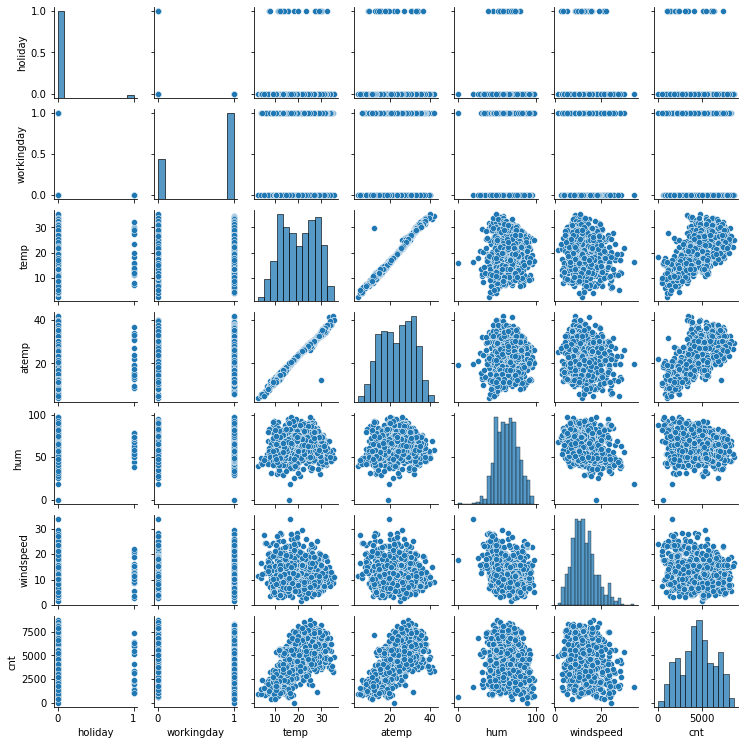

In [150]:
# Pair plot for all numeric values
plt.figure(figsize = (20, 12))
sns.pairplot(boom_bikes, height = 1.5)
plt.show()

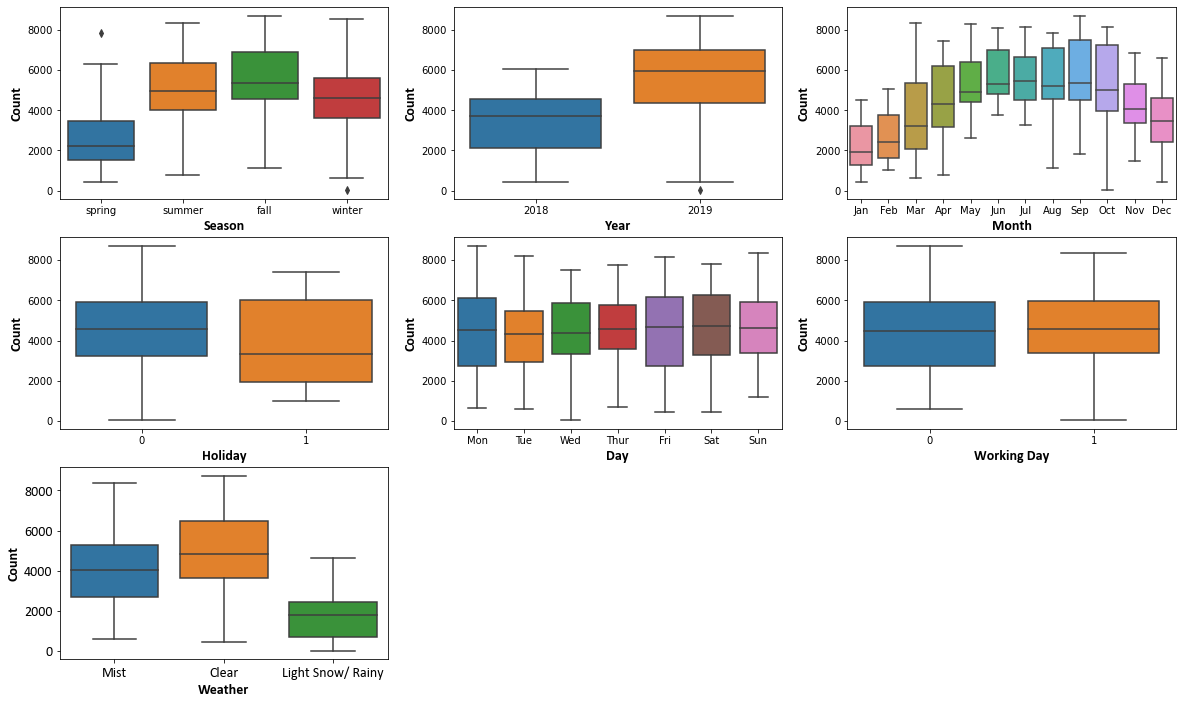

In [151]:
# Plotting boxplot for categorical data
plt.figure(figsize = (20, 12))
season_plot = plt.subplot(3, 3, 1)
sns.boxplot(data = boom_bikes, x = 'season', y ='cnt')
season_plot.set_xlabel(xlabel = 'Season', fontsize = 14, weight = 'bold', fontname = 'Calibri')
season_plot.set_ylabel(ylabel = 'Count', fontsize = 14, weight = 'bold', fontname = 'Calibri')

yr_plot = plt.subplot(3, 3, 2)
sns.boxplot(data = boom_bikes, x = 'yr', y ='cnt')
yr_plot.set_xlabel(xlabel = 'Year', fontsize = 14, weight = 'bold', fontname = 'Calibri')
yr_plot.set_ylabel(ylabel = 'Count', fontsize = 14, weight = 'bold', fontname = 'Calibri')

mnth_plot = plt.subplot(3, 3, 3)
sns.boxplot(data = boom_bikes, x = 'mnth', y ='cnt')
mnth_plot.set_xlabel(xlabel = 'Month', fontsize = 14, weight = 'bold', fontname = 'Calibri')
mnth_plot.set_ylabel(ylabel = 'Count', fontsize = 14, weight = 'bold', fontname = 'Calibri')

holiday_plot = plt.subplot(3, 3, 4)
sns.boxplot(data = boom_bikes, x = 'holiday', y ='cnt')
holiday_plot.set_xlabel(xlabel = 'Holiday', fontsize = 14, weight = 'bold', fontname = 'Calibri')
holiday_plot.set_ylabel(ylabel = 'Count', fontsize = 14, weight = 'bold', fontname = 'Calibri')

weekday_plot = plt.subplot(3, 3, 5)
sns.boxplot(data = boom_bikes, x = 'weekday', y ='cnt')
weekday_plot.set_xlabel(xlabel = 'Day', fontsize = 14, weight = 'bold', fontname = 'Calibri')
weekday_plot.set_ylabel(ylabel = 'Count', fontsize = 14, weight = 'bold', fontname = 'Calibri')

workingday_plot = plt.subplot(3, 3, 6)
sns.boxplot(data = boom_bikes, x = 'workingday', y ='cnt')
workingday_plot.set_xlabel(xlabel = 'Working Day', fontsize = 14, weight = 'bold', fontname = 'Calibri')
workingday_plot.set_ylabel(ylabel = 'Count', fontsize = 14, weight = 'bold', fontname = 'Calibri')

weathersit_plot = plt.subplot(3, 3, 7)
sns.boxplot(data = boom_bikes, x = 'weathersit', y ='cnt')
weathersit_plot.set_xlabel(xlabel = 'Weather', fontsize = 14, weight = 'bold', fontname = 'Calibri')
weathersit_plot.set_ylabel(ylabel = 'Count', fontsize = 14, weight = 'bold', fontname = 'Calibri')

plt.xticks(fontsize = 14, fontname = 'Calibri')
plt.yticks(fontsize = 14, fontname = 'Calibri')
plt.show()


### Derived Variables

We will create derived variables from weekday column. We will group the values Mon- Thurs as weekdays and Sat - Sun as weekends

In [152]:
# Creating derived variable for weekday
week_day = ['Mon', 'Tue', 'Wed', 'Thurs']
boom_bikes['weekday'] = boom_bikes['weekday'].apply(lambda x: 'weekday' if x in week_day else 'weekend')
boom_bikes.head()

season    yr mnth  holiday  weekday  workingday weathersit       temp  \
0  spring  2018  Jan        0  weekday           0       Mist  14.110847   
1  spring  2018  Jan        0  weekday           0       Mist  14.902598   
2  spring  2018  Jan        0  weekday           1      Clear   8.050924   
3  spring  2018  Jan        0  weekend           1      Clear   8.200000   
4  spring  2018  Jan        0  weekend           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

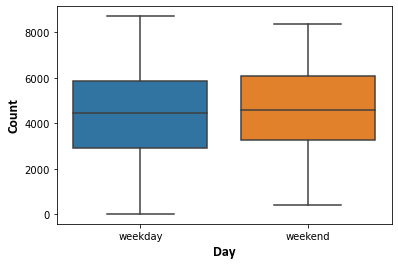

In [153]:
# Plotting weekday column against cnt
fig = sns.boxplot(data = boom_bikes, x = 'weekday', y ='cnt')
fig.set_xlabel(xlabel = 'Day', fontsize = 14, weight = 'bold', fontname = 'Calibri')
fig.set_ylabel(ylabel = 'Count', fontsize = 14, weight = 'bold', fontname = 'Calibri')
plt.show()

### Dummy Variables

We need to create dummy variables for categorical variables, i.e., Season, Year, Month, Weekday, Weather

In [154]:
# Creating dummy variables for season and storing in a new dataframe dummy_vars_season
dummy_vars_season = pd.get_dummies(boom_bikes['season'])

In [155]:
# Checking how dummy_vars_season looks like
dummy_vars_season.head()

fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

In [156]:
# Dropping first column from dummy_vars_season
dummy_vars_season = pd.get_dummies(boom_bikes['season'], drop_first = True)
dummy_vars_season.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [157]:
# Creating dummy variables for year and dropping the first column
dummy_vars_yr = pd.get_dummies(boom_bikes['yr'], drop_first = True)

In [158]:
# Checking how dummy_vars_yr looks like
dummy_vars_yr.head()

2019
0     0
1     0
2     0
3     0
4     0

In [159]:
# Creating dummy variables for month and storing in a new dataframe dummy_vars_mnth
dummy_vars_mnth = pd.get_dummies(boom_bikes['mnth'], drop_first = True)

In [160]:
# Checking how dummy_vars_mnth looks like
dummy_vars_mnth.head()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0

In [161]:
# Creating dummy variables for weekday and storing in a new dataframe dummy_vars_weekday
dummy_vars_weekday = pd.get_dummies(boom_bikes['weekday'], drop_first = True)

In [162]:
# Checking how dummy_vars_weekday looks like
dummy_vars_weekday.head()

weekend
0        0
1        0
2        0
3        1
4        1

In [163]:
# Creating dummy variables for weathersit and storing in a new dataframe dummy_vars_weather
dummy_vars_weather = pd.get_dummies(boom_bikes['weathersit'], drop_first = True)

In [164]:
# Checking how dummy_vars_weekday looks like
dummy_vars_weather.head()

Light Snow/ Rainy  Mist
0                  0     1
1                  0     1
2                  0     0
3                  0     0
4                  0     0

In [165]:
# Adding these dummy variables to original dataframe
boom_bikes = pd.concat([boom_bikes, dummy_vars_season, dummy_vars_yr, dummy_vars_mnth, dummy_vars_weekday, dummy_vars_weather],
                       axis = 1)

# Checking the boom_bikes dataframe
boom_bikes.head()

season    yr mnth  holiday  weekday  workingday weathersit       temp  \
0  spring  2018  Jan        0  weekday           0       Mist  14.110847   
1  spring  2018  Jan        0  weekday           0       Mist  14.902598   
2  spring  2018  Jan        0  weekday           1      Clear   8.050924   
3  spring  2018  Jan        0  weekend           1      Clear   8.200000   
4  spring  2018  Jan        0  weekend           1      Clear   9.305237   

      atemp      hum  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  weekend  \
0  18.18125  80.5833  ...    0    0    0    0    0    0    0        0   
1  17.68695  69.6087  ...    0    0    0    0    0    0    0        0   
2   9.47025  43.7273  ...    0    0    0    0    0    0    0        0   
3  10.60610  59.0435  ...    0    0    0    0    0    0    0        1   
4  11.46350  43.6957  ...    0    0    0    0    0    0    0        1   

   Light Snow/ Rainy  Mist  
0                  0     1  
1                  0     1  
2                  0     0  
3                  0     0  
4                  0     0  

[5 rows x 30 columns]

In [166]:
# Dropping the colums of variables season, year, month, weekday, workingday, weathersit as we have dummy variables for the same
boom_bikes.drop(['season', 'yr', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [167]:
# Checking the boom_bikes dataframe
boom_bikes.head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  spring  \
0        0           0  14.110847  18.18125  80.5833  10.749882   985       1   
1        0           0  14.902598  17.68695  69.6087  16.652113   801       1   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349       1   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562       1   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600       1   

   summer  winter  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  weekend  \
0       0       0  ...    0    0    0    0    0    0    0        0   
1       0       0  ...    0    0    0    0    0    0    0        0   
2       0       0  ...    0    0    0    0    0    0    0        0   
3       0       0  ...    0    0    0    0    0    0    0        1   
4       0       0  ...    0    0    0    0    0    0    0        1   

   Light Snow/ Rainy  Mist  
0                  0     1  
1                  0     1  
2                  0     0  
3                  0     0  
4                  0     0  

[5 rows x 25 columns]

### Train Test Split

We will split the original data into Train and Test sets in ratio 70 & 30 respectively

In [168]:
# For train & test set to always have the same rows
np.random.seed(0)
boom_bikes_train, boom_bikes_test = train_test_split(boom_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [169]:
# Checking the train set
boom_bikes_train.head()

holiday  workingday       temp    atemp      hum  windspeed   cnt  \
653        0           1  19.201653  23.0423  55.8333  12.208807  7534   
576        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482        0           0  15.443347  18.8752  48.9583   8.708325  4220   

     spring  summer  winter  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  weekend  \
653       0       0       1  ...    0    0    0    0    0    1    0        1   
576       0       0       0  ...    1    0    0    0    0    0    0        1   
426       1       0       0  ...    0    0    1    0    0    0    0        0   
728       1       0       0  ...    0    0    0    0    0    0    0        0   
482       0       1       0  ...    0    0    0    0    0    0    0        0   

     Light Snow/ Rainy  Mist  
653                  0     0  
576                  0     0  
426                  0     1  
728                  0     0  
482                  0     1  

[5 rows x 25 columns]

### Rescaling the features

We will rescale the temp, atemp, hum, windspeed columns, so that their coefficients at the time of model building are comparable to other variables and are easy to interpret.

We will use MinMax Scaling for the same.

In [170]:
scaler = MinMaxScaler()

# Applying scaler() to coulmns temp, atemp, hum, windspeed
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

boom_bikes_train[num_vars] = scaler.fit_transform(boom_bikes_train[num_vars])

In [171]:
# Checking boom_bikes dataframe
boom_bikes_train.head()

holiday  workingday      temp     atemp       hum  windspeed   cnt  \
653        0           1  0.509887  0.501133  0.575354   0.300794  7534   
576        0           1  0.815169  0.766351  0.725633   0.264686  7216   
426        0           0  0.442393  0.438975  0.640189   0.255342  4066   
728        0           0  0.245101  0.200348  0.498067   0.663106  1796   
482        0           0  0.395666  0.391735  0.504508   0.188475  4220   

     spring  summer  winter  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  weekend  \
653       0       0       1  ...    0    0    0    0    0    1    0        1   
576       0       0       0  ...    1    0    0    0    0    0    0        1   
426       1       0       0  ...    0    0    1    0    0    0    0        0   
728       1       0       0  ...    0    0    0    0    0    0    0        0   
482       0       1       0  ...    0    0    0    0    0    0    0        0   

     Light Snow/ Rainy  Mist  
653                  0     0  
576                  0     0  
426                  0     1  
728                  0     0  
482                  0     1  

[5 rows x 25 columns]

In [172]:
# Checking if scaling was applied correctly
boom_bikes_train.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.676471    0.537262    0.512989    0.650369    0.320768   
std      0.157763    0.468282    0.225844    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.540519    0.526811    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               cnt      spring      summer     winter  ...         Jul  \
count   510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean   4486.382353    0.243137    0.245098    0.24902  ...    0.076471   
std    1952.158739    0.429398    0.430568    0.43287  ...    0.266010   
min      22.000000    0.000000    0.000000    0.00000  ...    0.000000   
25%    3120.000000    0.000000    0.000000    0.00000  ...    0.000000   
50%    4530.000000    0.000000    0.000000    0.00000  ...    0.000000   
75%    5973.500000    0.000000    0.000000    0.00000  ...    0.000000   
max    8714.000000    1.000000    1.000000    1.00000  ...    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.074510    0.098039    0.084314    0.086275    0.086275    0.080392   
std      0.262857    0.297660    0.278131    0.281045    0.281045    0.272166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          weekend  Light Snow/ Rainy        Mist  
count  510.000000         510.000000  510.000000  
mean     0.550980           0.029412    0.343137  
std      0.497883           0.169124    0.475223  
min      0.000000           0.000000    0.000000  
25%      0.000000           0.000000    0.000000  
50%      1.000000           0.000000    0.000000  
75%      1.000000           0.000000    1.000000  
max      1.000000           1.000000    1.000000  

[8 rows x 25 columns]

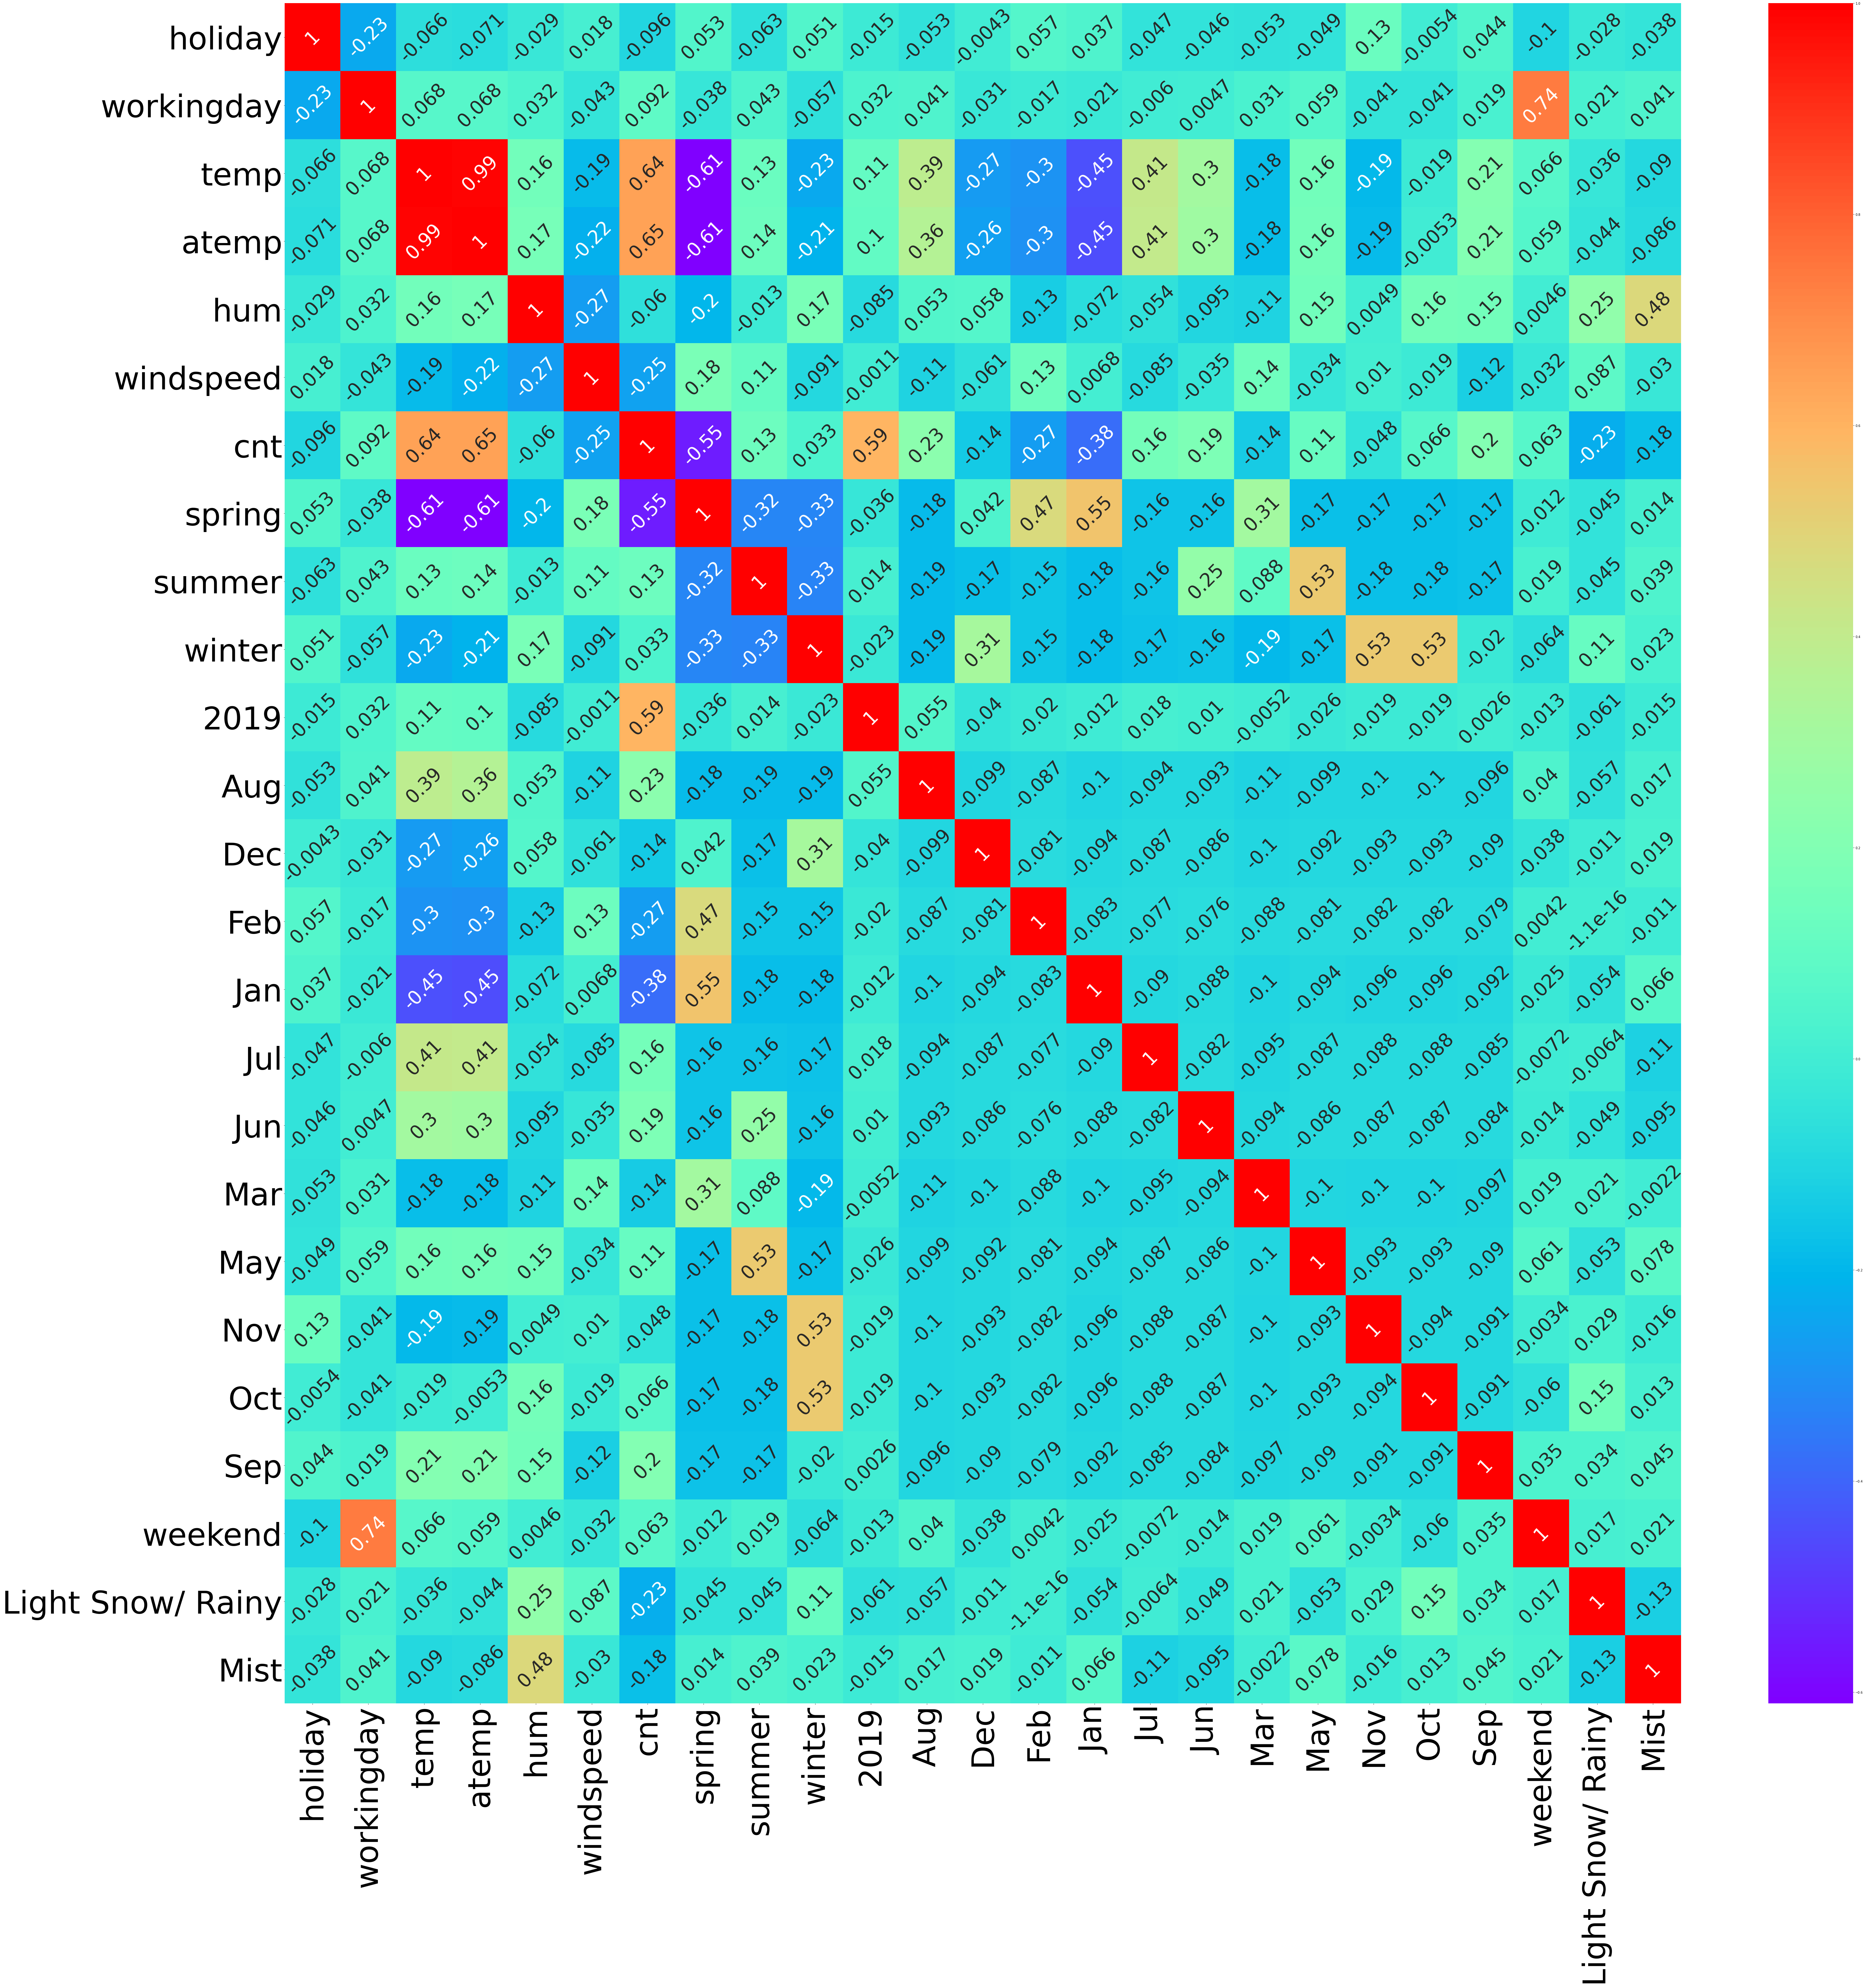

In [177]:
# Checking the correlation coefficients to understand the variables with high correlation
plt.figure(figsize = (100,100))
fig = sns.heatmap(boom_bikes_train.corr(), cmap = 'rainbow', annot = True, annot_kws = {'size' : 60, 'rotation' : 45})
plt.yticks(fontsize = 100, rotation = 0)
plt.xticks(fontsize = 100, rotation = 90)
plt.show()

### Model Building

#### Dividing train set to X & y set for model building

In [178]:
# Dividing train set to X & y set

y_train = boom_bikes_train.pop('cnt')
X_train = boom_bikes_train

In [179]:
# Checking y train set
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [180]:
# Checking X train set
X_train.head()

holiday  workingday      temp     atemp       hum  windspeed  spring  \
653        0           1  0.509887  0.501133  0.575354   0.300794       0   
576        0           1  0.815169  0.766351  0.725633   0.264686       0   
426        0           0  0.442393  0.438975  0.640189   0.255342       1   
728        0           0  0.245101  0.200348  0.498067   0.663106       1   
482        0           0  0.395666  0.391735  0.504508   0.188475       0   

     summer  winter  2019  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  weekend  \
653       0       1     1  ...    0    0    0    0    0    1    0        1   
576       0       0     1  ...    1    0    0    0    0    0    0        1   
426       0       0     1  ...    0    0    1    0    0    0    0        0   
728       0       0     1  ...    0    0    0    0    0    0    0        0   
482       1       0     1  ...    0    0    0    0    0    0    0        0   

     Light Snow/ Rainy  Mist  
653                  0     0  
576                  0     0  
426                  0     1  
728                  0     0  
482                  0     1  

[5 rows x 24 columns]

We will first apply automated feature elimination for coarse tuning and then manual feature selection for fine tuning

We will use Recursive Feature Elimination (RFE) for automated feature elimination

#### Recursive Feature Elimination (RFE)

In [181]:
# Running RFE for total output variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [182]:
# Listing the columns after running RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 9),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('weekend', False, 6),
 ('Light Snow/ Rainy', True, 1),
 ('Mist', True, 1)]

In [183]:
# Creating dataframe from columns obatined by RFE
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       '2019', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow/ Rainy', 'Mist'],
      dtype='object')

In [184]:
# Checking list which were eliminated by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'weekend'],
      dtype='object')

#### Manual Feature Elimination

We will now carry out manual feature elimination approach for fine tuning by using statsmodels package

In [185]:
# Creating X_train dataframe from attributes selscted by RFE
X_train_rfe = X_train[col]
X_train_rfe.head()

holiday      temp       hum  windspeed  spring  summer  winter  2019  \
653        0  0.509887  0.575354   0.300794       0       0       1     1   
576        0  0.815169  0.725633   0.264686       0       0       0     1   
426        0  0.442393  0.640189   0.255342       1       0       0     1   
728        0  0.245101  0.498067   0.663106       1       0       0     1   
482        0  0.395666  0.504508   0.188475       0       1       0     1   

     Dec  Jan  Jul  Nov  Sep  Light Snow/ Rainy  Mist  
653    0    0    0    0    0                  0     0  
576    0    0    1    0    0                  0     0  
426    0    0    0    0    0                  0     1  
728    1    0    0    0    0                  0     0  
482    0    0    0    0    0                  0     1

In [186]:
# Adding intercept to X_train_rfe dataframe
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

const  holiday      temp       hum  windspeed  spring  summer  winter  \
653    1.0        0  0.509887  0.575354   0.300794       0       0       1   
576    1.0        0  0.815169  0.725633   0.264686       0       0       0   
426    1.0        0  0.442393  0.640189   0.255342       1       0       0   
728    1.0        0  0.245101  0.498067   0.663106       1       0       0   
482    1.0        0  0.395666  0.504508   0.188475       0       1       0   

     2019  Dec  Jan  Jul  Nov  Sep  Light Snow/ Rainy  Mist  
653     1    0    0    0    0    0                  0     0  
576     1    0    0    1    0    0                  0     0  
426     1    0    0    0    0    0                  0     1  
728     1    1    0    0    0    0                  0     0  
482     1    0    0    0    0    0                  0     1

In [187]:
# Running linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [188]:
# Checking summary of linear model lm
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          3.34e-189
Time:                        00:12:11   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2805.5562    313.247      8.956      0.000    2190.094    3421.018
holiday            -792.9576    222.372     -3.566      0.000   -1229.869    -356.046
temp               4171.9558    321.485     12.977      0.000    3540.310    4803.602
hum               -1392.6928    328.473     -4.240      0.000   -2038.070    -747.316
windspeed         -1638.0696    224.026     -7.312      0.000   -2078.231   -1197.908
spring             -536.6145    184.595     -2.907      0.004    -899.303    -173.926
summer              354.3458    133.284      2.659      0.008      92.473     616.219
winter              899.0547    156.011      5.763      0.000     592.528    1205.581
2019               2002.0119     70.219     28.511      0.000    1864.047    2139.977
Dec                -323.3380    151.741     -2.131      0.034    -621.476     -25.200
Jan                -380.2573    157.486     -2.415      0.016    -689.682     -70.833
Jul                -482.3654    158.338     -3.046      0.002    -793.464    -171.267
Nov                -355.9259    162.747     -2.187      0.029    -675.688     -36.164
Sep                 650.9555    146.680      4.438      0.000     362.762     939.149
Light Snow/ Rainy -2156.6258    229.385     -9.402      0.000   -2607.317   -1705.934
Mist               -485.6769     90.983     -5.338      0.000    -664.439    -306.915
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# Calculating VIF of various variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const  82.48
5              spring   5.27
2                temp   4.42
7              winter   3.83
6              summer   2.76
3                 hum   1.93
12                Nov   1.76
10                Jan   1.68
15               Mist   1.57
9                 Dec   1.49
11                Jul   1.49
13                Sep   1.34
14  Light Snow/ Rainy   1.26
4           windspeed   1.21
8                2019   1.04
1             holiday   1.03

We observe that the VIF of spring is above 5, and hence, we will drop the spring column

In [190]:
# Dropping the spring column
X_train_new = X_train_rfe.drop('spring', axis = 1)
X_train_new.head()

const  holiday      temp       hum  windspeed  summer  winter  2019  Dec  \
653    1.0        0  0.509887  0.575354   0.300794       0       1     1    0   
576    1.0        0  0.815169  0.725633   0.264686       0       0     1    0   
426    1.0        0  0.442393  0.640189   0.255342       0       0     1    0   
728    1.0        0  0.245101  0.498067   0.663106       0       0     1    1   
482    1.0        0  0.395666  0.504508   0.188475       1       0     1    0   

     Jan  Jul  Nov  Sep  Light Snow/ Rainy  Mist  
653    0    0    0    0                  0     0  
576    0    1    0    0                  0     0  
426    0    0    0    0                  0     1  
728    0    0    0    0                  0     0  
482    0    0    0    0                  0     1

In [191]:
# Adding intercept to model
X_train_lm = sm.add_constant(X_train_new)

# Rebuilding model without spring column
lm = sm.OLS(y_train, X_train_lm).fit()

# Checking summary of new model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.54e-188
Time:                        00:13:06   Log-Likelihood:                -4115.4
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2249.6749    249.969      9.000      0.000    1758.545    2740.805
holiday            -823.4374    223.790     -3.680      0.000   -1263.133    -383.742
temp               4815.7051    234.798     20.510      0.000    4354.382    5277.028
hum               -1497.7136    328.928     -4.553      0.000   -2143.981    -851.446
windspeed         -1711.8331    224.253     -7.633      0.000   -2152.439   -1271.227
summer              622.5274     96.917      6.423      0.000     432.107     812.948
winter             1205.7092    115.803     10.412      0.000     978.184    1433.235
2019               1989.9481     70.622     28.178      0.000    1851.193    2128.704
Dec                -271.1494    151.805     -1.786      0.075    -569.412      27.113
Jan                -413.5337    158.247     -2.613      0.009    -724.452    -102.615
Jul                -394.6901    156.604     -2.520      0.012    -702.381     -86.999
Nov                -269.8860    161.233     -1.674      0.095    -586.671      46.899
Sep                 780.9830    140.741      5.549      0.000     504.460    1057.506
Light Snow/ Rainy -2101.7053    230.320     -9.125      0.000   -2554.231   -1649.180
Mist               -460.4370     91.247     -5.046      0.000    -639.716    -281.158
==============================================================================
Omnibus:                       58.853   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.887
Skew:                          -0.650   Prob(JB):                     1.25e-27
Kurtosis:                       5.034   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
# Calculating VIF of various variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const  51.75
2                temp   2.32
6              winter   2.08
3                 hum   1.90
11                Nov   1.70
9                 Jan   1.67
14               Mist   1.55
8                 Dec   1.47
5              summer   1.44
10                Jul   1.43
13  Light Snow/ Rainy   1.25
12                Sep   1.21
4           windspeed   1.20
1             holiday   1.03
7                2019   1.03

We observe that the p-value of Dec is above 0.05, and hence, we will drop the Dec column

In [193]:
# Dropping the Dec column
X_train_new = X_train_new.drop('Dec', axis = 1)
X_train_new.head()

const  holiday      temp       hum  windspeed  summer  winter  2019  Jan  \
653    1.0        0  0.509887  0.575354   0.300794       0       1     1    0   
576    1.0        0  0.815169  0.725633   0.264686       0       0     1    0   
426    1.0        0  0.442393  0.640189   0.255342       0       0     1    0   
728    1.0        0  0.245101  0.498067   0.663106       0       0     1    0   
482    1.0        0  0.395666  0.504508   0.188475       1       0     1    0   

     Jul  Nov  Sep  Light Snow/ Rainy  Mist  
653    0    0    0                  0     0  
576    1    0    0                  0     0  
426    0    0    0                  0     1  
728    0    0    0                  0     0  
482    0    0    0                  0     1

In [194]:
# Adding intercept to model
X_train_lm = sm.add_constant(X_train_new)

# Rebuilding model without Dec column
lm = sm.OLS(y_train, X_train_lm).fit()

# Checking summary of new model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          5.15e-189
Time:                        00:13:40   Log-Likelihood:                -4117.0
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2163.5725    245.817      8.802      0.000    1680.601    2646.544
holiday            -828.3614    224.267     -3.694      0.000   -1268.991    -387.731
temp               4954.9150    221.974     22.322      0.000    4518.791    5391.039
hum               -1548.9181    328.399     -4.717      0.000   -2194.144    -903.693
windspeed         -1683.7044    224.193     -7.510      0.000   -2124.190   -1243.219
summer              646.1199     96.225      6.715      0.000     457.061     835.179
winter             1147.4434    111.358     10.304      0.000     928.651    1366.236
2019               1989.2983     70.777     28.107      0.000    1850.239    2128.357
Jan                -338.4649    152.900     -2.214      0.027    -638.877     -38.053
Jul                -406.5135    156.809     -2.592      0.010    -714.606     -98.421
Nov                -160.4578    149.469     -1.074      0.284    -454.128     133.213
Sep                 807.5724    140.260      5.758      0.000     531.996    1083.149
Light Snow/ Rainy -2058.7594    229.567     -8.968      0.000   -2509.803   -1607.716
Mist               -450.6776     91.284     -4.937      0.000    -630.029    -271.326
==============================================================================
Omnibus:                       54.721   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.587
Skew:                          -0.619   Prob(JB):                     5.88e-25
Kurtosis:                       4.928   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
# Calculating VIF of various variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               const  49.82
2                temp   2.07
6              winter   1.91
3                 hum   1.89
8                 Jan   1.55
13               Mist   1.55
10                Nov   1.45
9                 Jul   1.43
5              summer   1.41
12  Light Snow/ Rainy   1.24
11                Sep   1.20
4           windspeed   1.19
1             holiday   1.03
7                2019   1.03

We observe that the p-value of Nov is above 0.05, and hence, we will drop the Dec column

In [196]:
# Dropping the Nov column
X_train_new = X_train_new.drop('Nov', axis = 1)
X_train_new.head()

const  holiday      temp       hum  windspeed  summer  winter  2019  Jan  \
653    1.0        0  0.509887  0.575354   0.300794       0       1     1    0   
576    1.0        0  0.815169  0.725633   0.264686       0       0     1    0   
426    1.0        0  0.442393  0.640189   0.255342       0       0     1    0   
728    1.0        0  0.245101  0.498067   0.663106       0       0     1    0   
482    1.0        0  0.395666  0.504508   0.188475       1       0     1    0   

     Jul  Sep  Light Snow/ Rainy  Mist  
653    0    0                  0     0  
576    1    0                  0     0  
426    0    0                  0     1  
728    0    0                  0     0  
482    0    0                  0     1

In [197]:
# Adding intercept to model
X_train_lm = sm.add_constant(X_train_new)

# Rebuilding model without Nov column
lm = sm.OLS(y_train, X_train_lm).fit()

# Checking summary of new model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          6.03e-190
Time:                        00:15:12   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2145.9539    245.307      8.748      0.000    1663.988    2627.920
holiday            -856.6581    222.747     -3.846      0.000   -1294.299    -419.017
temp               4969.0281    221.618     22.422      0.000    4533.605    5404.452
hum               -1532.8724    328.109     -4.672      0.000   -2177.525    -888.220
windspeed         -1690.3369    224.142     -7.541      0.000   -2130.720   -1249.953
summer              647.4056     96.232      6.728      0.000     458.334     836.478
winter             1093.8858     99.573     10.986      0.000     898.250    1289.522
2019               1989.6797     70.787     28.108      0.000    1850.602    2128.758
Jan                -330.4766    152.743     -2.164      0.031    -630.578     -30.376
Jul                -409.5862    156.807     -2.612      0.009    -717.673    -101.500
Sep                 818.1271    139.936      5.846      0.000     543.187    1093.067
Light Snow/ Rainy -2053.4327    229.549     -8.946      0.000   -2504.438   -1602.428
Mist               -450.7975     91.298     -4.938      0.000    -630.175    -271.420
==============================================================================
Omnibus:                       53.475   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.257
Skew:                          -0.609   Prob(JB):                     3.11e-24
Kurtosis:                       4.900   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
# Checking the columns in the model
X_train_new.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       '2019', 'Jan', 'Jul', 'Sep', 'Light Snow/ Rainy', 'Mist'],
      dtype='object')

In [199]:
# Dropping the constant of the model
X_train_new = X_train_new.drop(['const'], axis = 1)

### Residual Analysis

We will check the plot of error terms and confirm if it has normal distribution and has its mean at 0. This is one of the most important assumptions in linear regression model

In [200]:
# Predicting the y values of train set
y_train_cnt = lm.predict(X_train_lm)

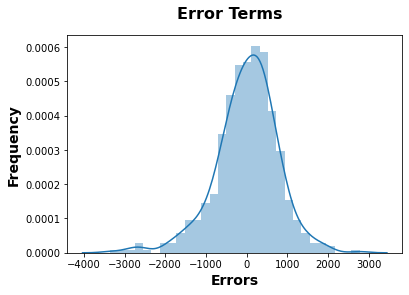

In [201]:
# Plotting the error terms 
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 30)
fig.suptitle('Error Terms', fontsize = 16, weight = 'bold')
plt.xlabel('Errors', fontsize = 14, weight = 'bold')
plt.ylabel('Frequency', fontsize = 14, weight = 'bold')
plt.show()

### Predictions on Test Set

In [202]:
# Scaling on test sets
boom_bikes_test[num_vars] = scaler.transform(boom_bikes_test[num_vars])

In [203]:
# Checking numeric values of test set after scaling
boom_bikes_test.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.036530    0.698630    0.558941    0.532991    0.638508    0.313350   
std      0.188034    0.459904    0.233698    0.217888    0.148974    0.159947   
min      0.000000    0.000000    0.046591    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.354650    0.344751    0.527265    0.198517   
50%      0.000000    1.000000    0.558691    0.549198    0.627737    0.299459   
75%      0.000000    1.000000    0.759096    0.714132    0.743928    0.403048   
max      1.000000    1.000000    0.984424    0.980934    1.002146    0.807474   

               cnt      spring      summer      winter  ...         Jul  \
count   219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean   4546.981735    0.255708    0.264840    0.232877  ...    0.105023   
std    1898.633630    0.437258    0.442259    0.423633  ...    0.307285   
min     441.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%    3303.500000    0.000000    0.000000    0.000000  ...    0.000000   
50%    4579.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%    5869.500000    1.000000    1.000000    0.000000  ...    0.000000   
max    8395.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.095890    0.054795    0.086758    0.073059    0.082192    0.086758   
std      0.295115    0.228100    0.282125    0.260830    0.275286    0.282125   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          weekend  Light Snow/ Rainy        Mist  
count  219.000000         219.000000  219.000000  
mean     0.607306           0.027397    0.319635  
std      0.489468           0.163612    0.467403  
min      0.000000           0.000000    0.000000  
25%      0.000000           0.000000    0.000000  
50%      1.000000           0.000000    0.000000  
75%      1.000000           0.000000    1.000000  
max      1.000000           1.000000    1.000000  

[8 rows x 25 columns]

#### Divinding into X_test and y_test

In [204]:
# Creating y_test
y_test = boom_bikes_test.pop('cnt')

# Creating X_test
X_test = boom_bikes_test

In [205]:
# Creating X_test_new dataframe with columns as in trained model
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [206]:
# Predicting y values for test set
y_pred = lm.predict(X_test_new)

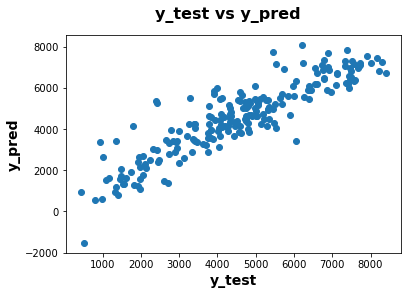

In [207]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=16, weight = 'bold')
plt.xlabel('y_test', fontsize=14, weight = 'bold')
plt.ylabel('y_pred', fontsize=14, weight = 'bold')
plt.show()

In [208]:
# Checking r2 score of test model
r_squared = r2_score(y_test, y_pred)
r_squared

0.8029170032329543

The equation for best fitted line:

$ cnt = -856.66 \times holiday + 4969.03 \times temp - 1532.87 \times hum - 1690.34 \times windspeed + 647.40 \times summer + 1093.88 \times winter + 1989.68 \times 2019 - 330.48 \times Jan -409.59 \times Jul + 818.13 \times Sep - 2053.43 \times Light Snow/Rainy -450.79 \times Mist $